# Tarea 2.1

El objetivo de este notebook es construir un modelo de regresión lineal lo más preciso posible.

### Setup

In [405]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [406]:
# Las variables a considerar en este experimento serán:
NLIMIT = 3000
TEST_SIZE = 0.1

### Utils

In [407]:
def get_most_accurate_split(X, y, nlimit=1000, test_size=0.1):
    '''
    Funcion que retorna el random_state mas preciso para entrenar un modelo de Regresion Lineal.
    
    Retorna:
        (score_obtenido, random_state)

    Justificación: 
        Considerando que la precisión del modelo depende en gran medida de los datos de entrada,
        y los datos de entrada dependen del split que se realiza, el cual es aleatorio, entonces
        obtener el split de entrenamiento más adecuado es necesario para obtener el modelo más 
        preciso.
    '''
    scores = []
    for random_state in range(nlimit + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        model = LinearRegression()
        model.fit(X_train, y_train)
        
        score = model.score(X_test, y_test)
        scores.append((score, random_state))
    max_score = max(scores)
    return max_score
        
    

def make_regression(casas_df, y_col='median_house_value', accurate_split=False, nlimit=1000, test_size=0.1):
    '''
    Funcion utilitaria que será utilizada para entrenar distintos modelos de regresion lineal
    con distintos datos de entrada.

    Retorna:
        El modelo más preciso de Regresion Lineal de los datos ingresados y el score R2 (aka. precision)
        obtenido.
    '''
    X = casas_df.drop(y_col, axis=1)
    y = casas_df[[y_col]]

    _, random_state = get_most_accurate_split(X, y, nlimit, test_size)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)

    return model, score, random_state

## LECTURA DE DATOS

In [408]:
datos = pd.read_csv('U4_01_housing.csv')
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Información General

In [409]:
print('Dataset Shape:', datos.shape)

Dataset Shape: (20640, 10)


In [410]:
print('COLUMNAS:', *datos.columns, sep='\n -> ')

COLUMNAS:
 -> longitude
 -> latitude
 -> housing_median_age
 -> total_rooms
 -> total_bedrooms
 -> population
 -> households
 -> median_income
 -> median_house_value
 -> ocean_proximity


In [411]:
print('CANTIDAD DE FALTANTES:')
datos.isna().sum()

CANTIDAD DE FALTANTES:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [412]:
print('TIPOS DE DATOS:')
datos.dtypes

TIPOS DE DATOS:


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [413]:
print('ESTADISTICAS BASICAS:')
datos.describe()

ESTADISTICAS BASICAS:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [414]:
datos.drop('ocean_proximity', axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [415]:
print('FRECUENCIA DE VALORES EN ocean_proximity:')

datos['ocean_proximity'].value_counts()

FRECUENCIA DE VALORES EN ocean_proximity:


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Observaciones:

- `total_bedrooms` tiene 207 valores faltantes, pero tiene una correlación del 93% con `total_rooms`, por lo que se podrían llenar con total_rooms.
- `ocean_proximity` es la unica columna de tipo categorico y tiene pocos valores
    - ISLAND solo tiene 5 valores, los cuales se pueden descartar.
    - NEAR BAY y NEAR OCEAN son dos valores intercambiables, por lo que se podrían unir dejando 3 valores.
    - Si <1H OCEAN y NEAR OCEAN son similares, entonces migrarlas.

## EXPLORACIÓN DE DATOS

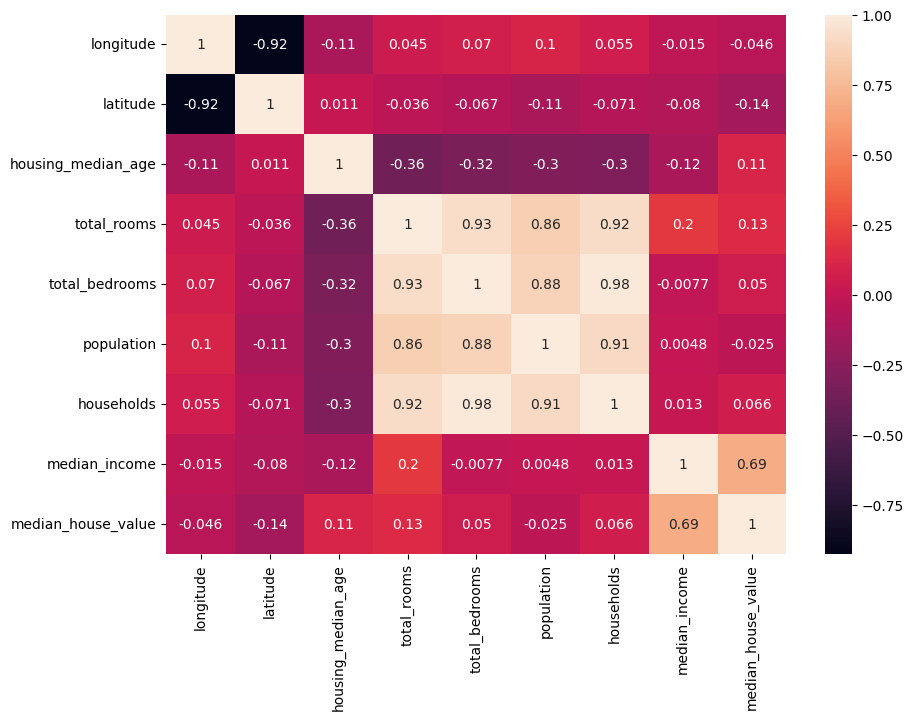

In [416]:
fig, ax = plt.subplots(figsize=(10, 7))
g = sns.heatmap(datos.drop('ocean_proximity', axis=1).corr(), annot=True)
plt.show()

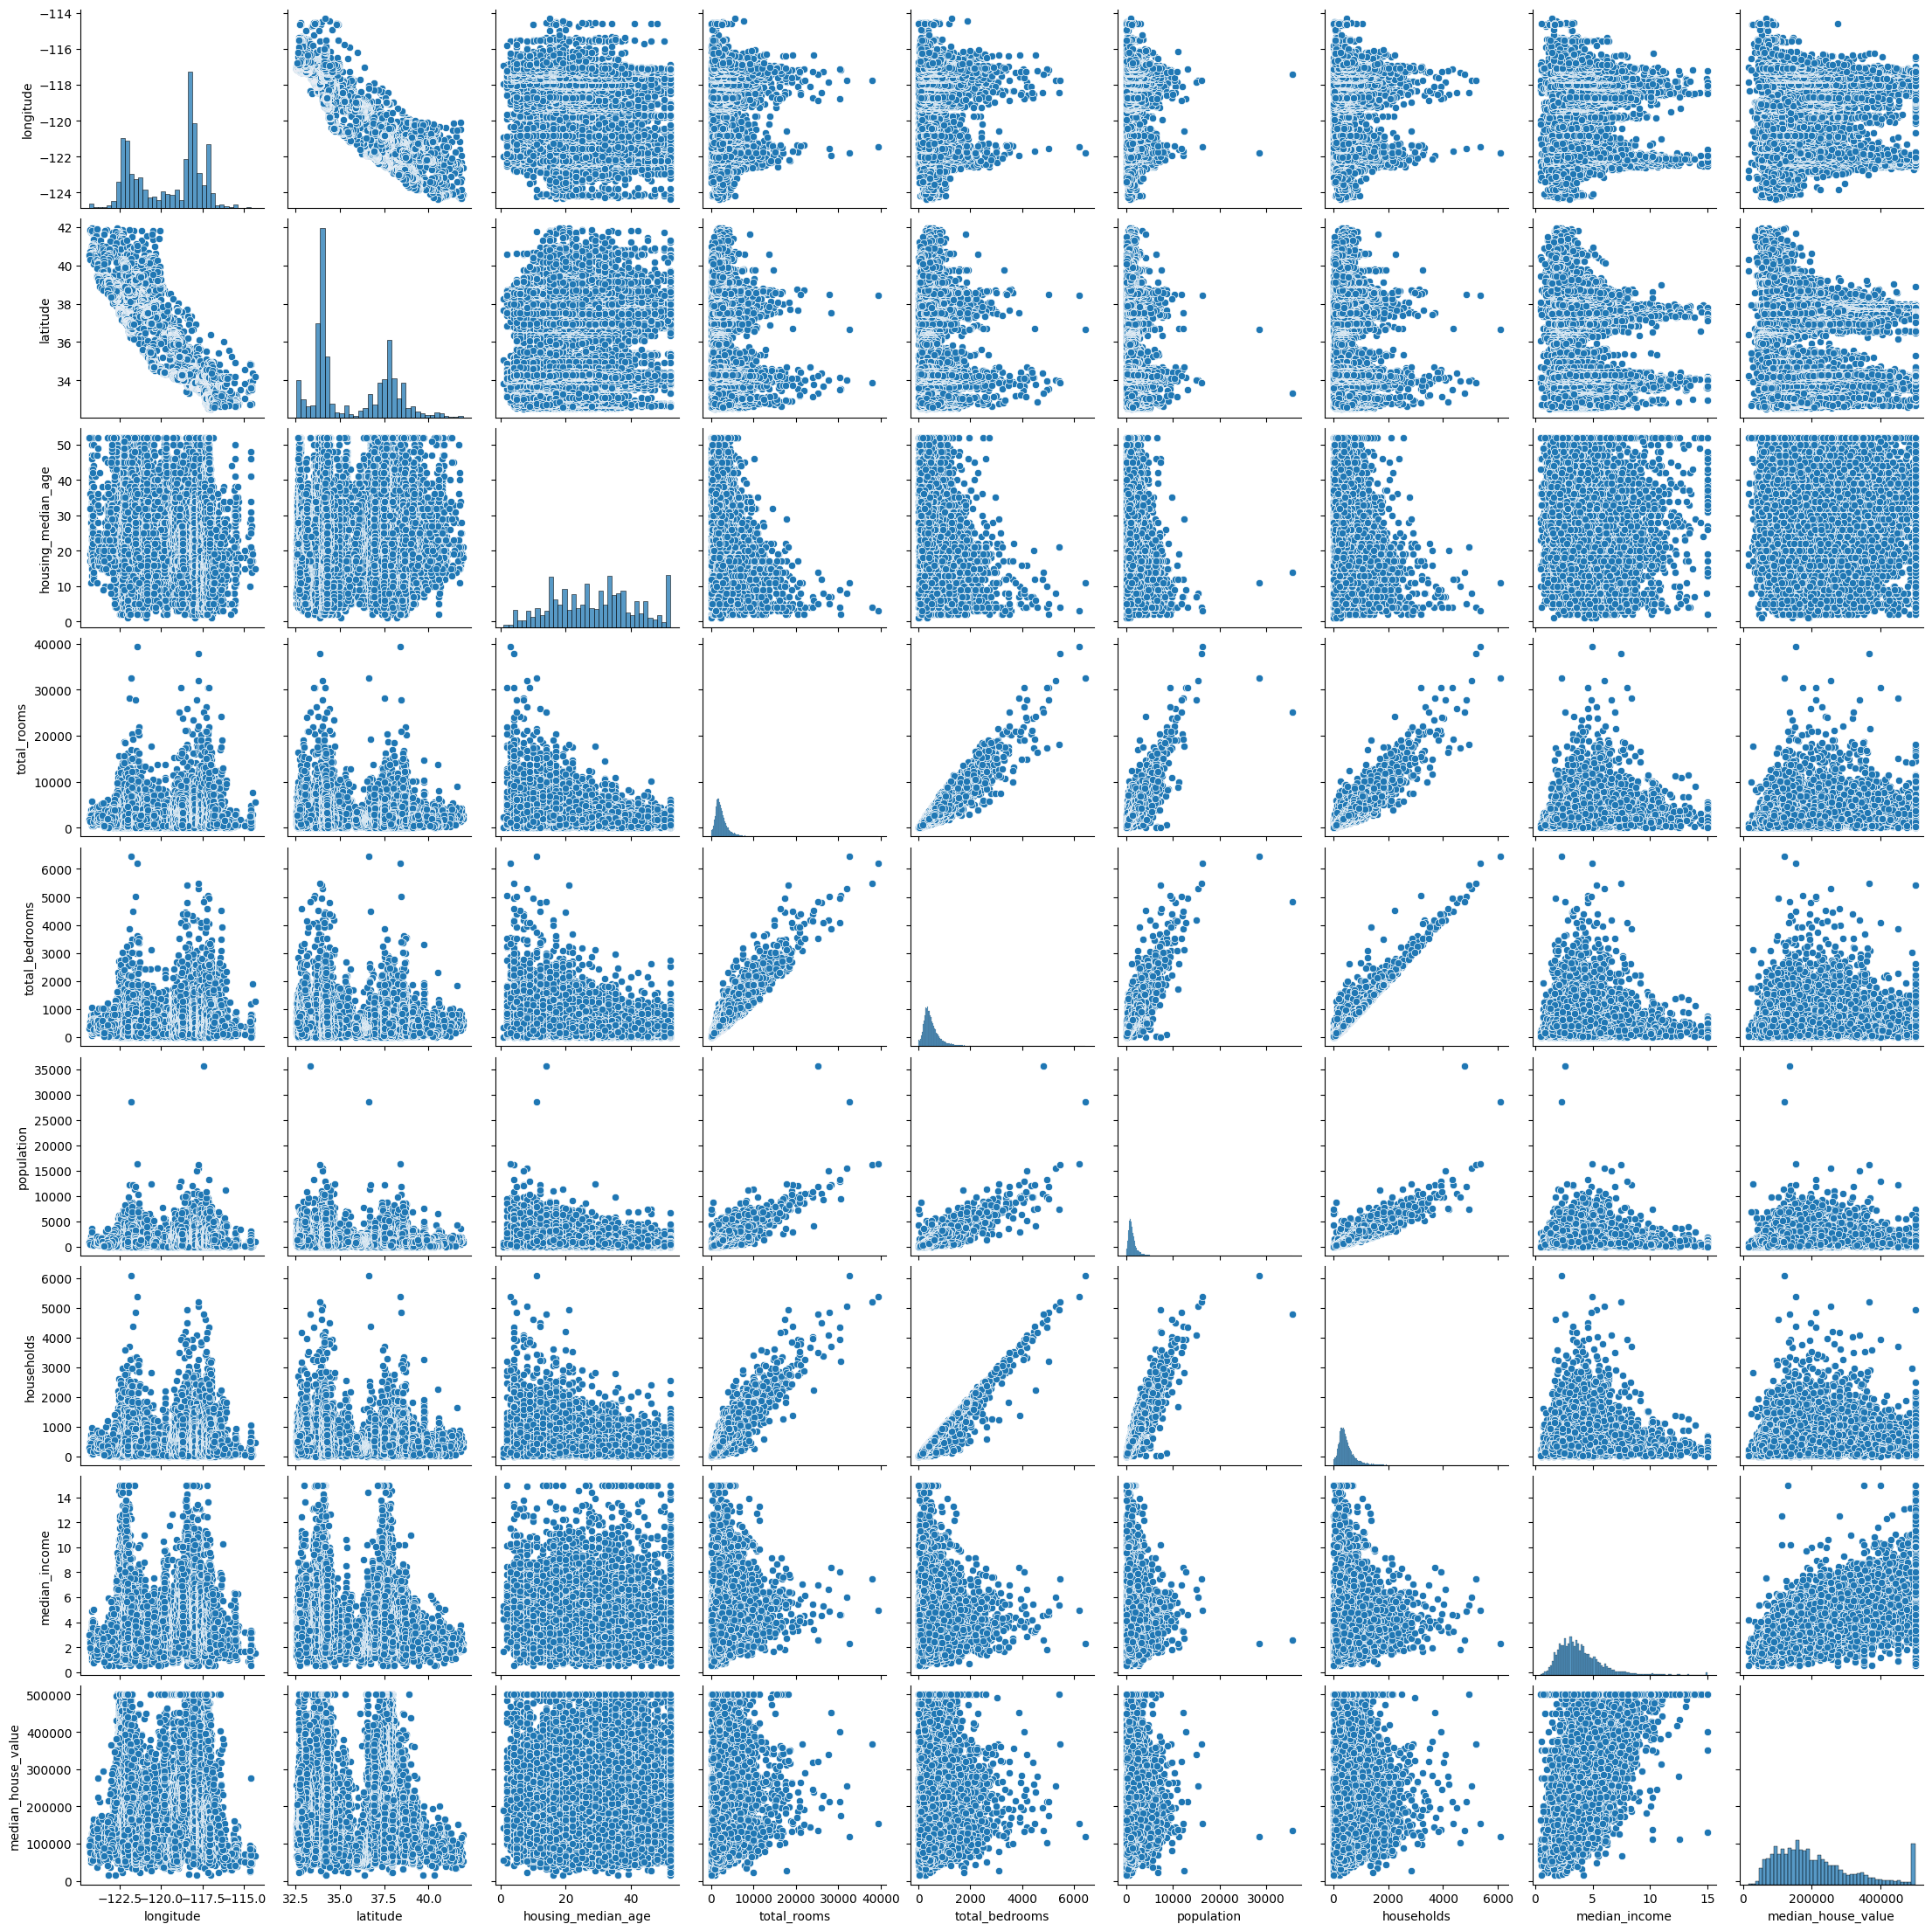

In [417]:
g = sns.pairplot(datos.drop('ocean_proximity', axis=1), )

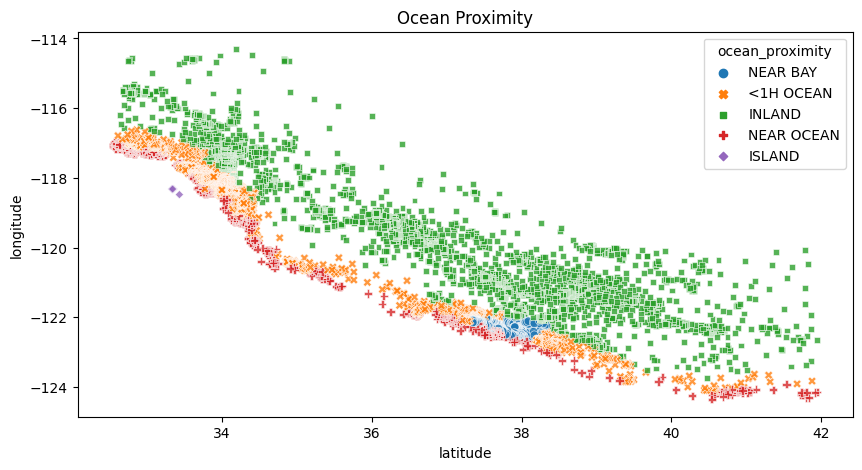

In [418]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.scatterplot(data=datos, x='latitude', y='longitude', hue='ocean_proximity', style='ocean_proximity', alpha=0.8)
g.set(title='Ocean Proximity')

plt.show()

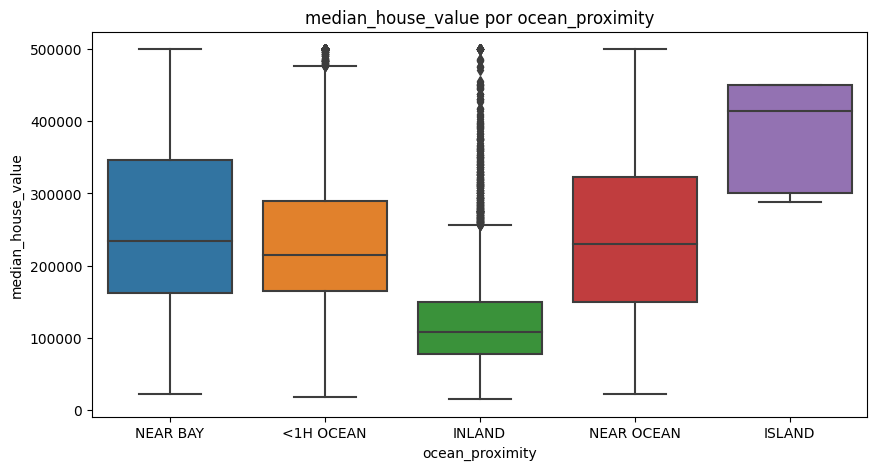

In [419]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(data=datos, x='ocean_proximity', y='median_house_value')
g.set(title='median_house_value por ocean_proximity')
plt.show()

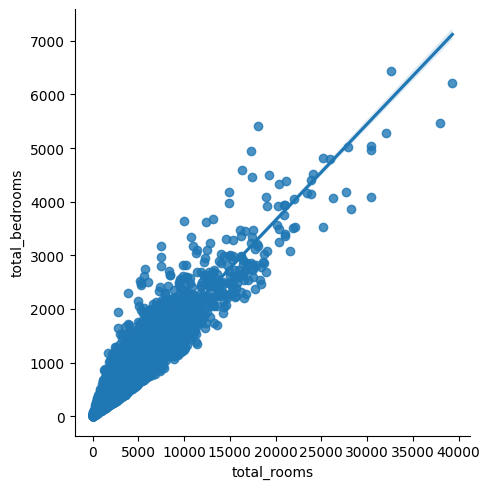

In [420]:
g = sns.lmplot(data=datos, x='total_rooms', y='total_bedrooms')

### Observaciones:

- `ocean_proximity` se puede convertir en booleano al eliminar **ISLAND**, y al unir **<1H OCEAN, NEAR OCEAN, NEAR BAY.**
    - **INLAND** tiene la mayor cantidad de valores atipicos.
- `total_bedrooms` tiene una alta correlacion a `total_rooms` por lo que para los valores faltantes, es facil rellenarlos con una regresion lineal. 

## LIMPIEZA DE DATOS

### Valores faltantes en `total_bedrooms`

Tomando en cuenta que la correlacion entre `total_bedrooms` y `total_rooms` que es de 93%, entonces podemos construir una regresion lineal para predecir los valores faltantes.


In [421]:
datos_na = datos.dropna()

X_train = datos_na[['total_rooms']]
y_train = datos_na[['total_bedrooms']]
X_test = datos[datos['total_bedrooms'].isna()][['total_rooms']]

lr = LinearRegression()
lr.fit(X_train, y_train)

valores_faltantes = lr.predict(X_test).astype(int)
datos.loc[X_test.index, 'total_bedrooms'] = valores_faltantes

### Conversion de Ocean_Proximity

Segun el analisis realizado anteriormente, se puede convertir Ocean_proximity en booleano uniendo algunos valores y eliminando el de la isla.

In [422]:
datos = datos[datos['ocean_proximity'] != 'ISLAND']
datos.loc[datos['ocean_proximity'].isin(['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY']), 'ocean_proximity'] = 1
datos.loc[datos['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 0
datos = datos.reset_index(drop=True)

## ENTRENAMIENTO DE MODELOS

### E1: Todos los datos

Utilizando todos los datos tal y como estan. ¿Cuál es la mayor precision posible?

In [423]:
datos_e1 = datos.copy()

lr, score, random_state = make_regression(datos_e1, accurate_split=True)
print('E1 Score:', score)

E1 Score: 0.6881450388206789


### E2: Datos Normalizados

Utilizando todos los datos, pero normalizados, ¿Mejorará la precisión anterior?

In [424]:
datos_e2 = datos.copy()
datos_e2 = pd.DataFrame(StandardScaler().fit_transform(datos_e2), columns=datos_e2.columns)

lr, score, random_state = make_regression(datos_e2, accurate_split=True)
print('E2 Score:', score)

E2 Score: 0.6881450388206838


### E3: Datos Normalizados para algunas columnas

Normalizando únicamente las variables con valor flotante, ¿mejorará la precisión de los datos normalizados?

In [425]:
datos_e3 = datos.copy()

columnas_e3 = ['median_income', 'median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']
for col in columnas_e3:
    datos_e3[col] = StandardScaler().fit_transform(datos_e3[col].values.reshape(-1, 1))

lr, score, random_state = make_regression(datos_e3, accurate_split=True)
print('E3 Score:', score)

E3 Score: 0.6881450388206838


### E4: Datos con housing_median_age < 50

Datos sin normalizar con housing_median_age < 50

In [426]:
datos_e4 = datos[datos['housing_median_age'] < 50].copy().reset_index(drop=True)

lr, score, random_state = make_regression(datos_e4, accurate_split=True)
print('E4 Score:', score)

E4 Score: 0.6964241429009115


### E5: Datos con median_house_value < 500000
Datos sin normalizar con median_house_value < 500000

In [427]:
datos_e5 = datos[datos['median_house_value'] < 500000].copy().reset_index(drop=True)

lr, score, random_state = make_regression(datos_e5, accurate_split=True)
print('E5 Score:', score)

E5 Score: 0.6664153266480264


### E6: Datos con median_income < 15

In [428]:
datos_e6 = datos[datos['median_income'] < 15].copy().reset_index(drop=True)

lr, score, random_state = make_regression(datos_e6, accurate_split=True)
print('E6 Score:', score)

E6 Score: 0.7024912461992654


### E7: Room-Bedroom ratio

In [429]:
datos_e7 = datos.copy()
datos_e7['room_bedroom_ratio'] = datos_e7['total_rooms'] / datos_e7['total_bedrooms']

lr, score, random_state = make_regression(datos_e7, accurate_split=True)
print('E7 Score:', score)

E7 Score: 0.688910752624071


### E8: population-household ratio

In [430]:
datos_e8 = datos.copy()
datos_e8['pop_household_ratio'] = datos_e8['population'] / datos_e8['households']

lr, score, random_state = make_regression(datos_e8, accurate_split=True)
print('E8 Score:', score)

E8 Score: 0.6882078835289501


### E9: poblacion por cuartos

In [431]:
datos_e9 = datos.copy()
datos_e9['room_population_ratio'] = datos_e9['total_rooms'] / datos_e9['population']

lr, score, random_state = make_regression(datos_e9, accurate_split=True)
print('E9 Score:', score)

E9 Score: 0.6932582836489984


### E10: Income per capita

In [432]:
datos_e10 = datos.copy()
datos_e10['income_per_capita'] = datos_e10['median_income'] / datos_e10['population']

lr, score, random_state = make_regression(datos_e10, accurate_split=True)
print('E10 Score:', score)

E10 Score: 0.6876434329308176


### E11: Todos los ratios con median_income < 15

In [433]:
datos_e11 = datos[(datos['median_income'] < 15)].copy().reset_index(drop=True)
datos_e11['room_bedroom_ratio'] = datos_e11['total_rooms'] / datos_e11['total_bedrooms']
datos_e11['pop_household_ratio'] = datos_e11['population'] / datos_e11['households']
datos_e11['room_population_ratio'] = datos_e11['total_rooms'] / datos_e11['population']
datos_e11['income_per_capita'] = datos_e11['median_income'] / datos_e11['population']

lr, score, random_state = make_regression(datos_e11, accurate_split=True)
print('E11 Score:', score)

E11 Score: 0.7118063718565452


### E12: Todo combinado

Todo lo anterior combinado

In [434]:
datos_e12 = datos[(datos['median_income'] < 15)].copy().reset_index(drop=True)
datos_e12['room_bedroom_ratio'] = datos_e12['total_rooms'] / datos_e12['total_bedrooms']
datos_e12['pop_household_ratio'] = datos_e12['population'] / datos_e12['households']
datos_e12['room_population_ratio'] = datos_e12['total_rooms'] / datos_e12['population']
datos_e12['income_per_capita'] = datos_e12['median_income'] / datos_e12['population']

datos_e12 = pd.DataFrame(StandardScaler().fit_transform(datos_e12), columns=datos_e12.columns)

lr, score, random_state = make_regression(datos_e12, accurate_split=True)
print('E12 Score:', score)

E12 Score: 0.7118063718565448


### E13: DecisionTreeRegressor

¿Alcanzará el 90% un decisionTree?

In [435]:
datos_e13 = datos[(datos['median_income'] < 15)].copy().reset_index(drop=True)
datos_e13['room_bedroom_ratio'] = datos_e13['total_rooms'] / datos_e13['total_bedrooms']
datos_e13['pop_household_ratio'] = datos_e13['population'] / datos_e13['households']
datos_e13['room_population_ratio'] = datos_e13['total_rooms'] / datos_e13['population']
datos_e13['income_per_capita'] = datos_e13['median_income'] / datos_e13['population']

X = datos_e13.drop('median_house_value', axis=1)
y = datos_e13[['median_house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=348)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('E13 Score:', score)

E13 Score: 0.7070284050153341


## CONCLUSIONES

- Aplicar StandardScaler al dataset no influye en la precision del algoritmo.
- Filtrar los median_income < 15 mejora ligeramente el resultado.
- Dividir multiples columnas resulta en un incremento ligero de los resultados, en especial por room_population_ratio.
- La precision maxima alcanzada fue de 71.18%. Mucho mejor a la precision vista en clase.
- Un algoritmo tan basico como el de regresion lineal no logrará llegar al 90% debido a la variabilidad de los datos. (Incluso DecisionTrees no superan el 70%)